In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('1.01. Simple linear regression.csv')

In [ ]:
df.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [ ]:
df.shape

(84, 2)

In [ ]:
df.columns

Index(['SAT', 'GPA'], dtype='object')

In [ ]:
df_duplicate_rows = df[df.duplicated()]
df_duplicate_rows.shape

(1, 2)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [ ]:
df.describe()

,SAT,GPA
count,83.000000,83.000000
mean,1846.253012,3.334217
std,104.777795,0.270794
min,1634.000000,2.400000
25%,1774.000000,3.195000
50%,1849.000000,3.380000
75%,1934.000000,3.505000
max,2050.000000,3.810000


In [ ]:
df.corr()

,SAT,GPA
SAT,1.000000,0.633714
GPA,0.633714,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard = StandardScaler()
df_scale = standard.fit_transform(df[['SAT','GPA']])


In [ ]:
df_scale

array([[-1.26989682, -3.47088543],
       [-1.7499981 , -3.02505078],
       [-0.82820364, -2.950745  ],
       [-1.54835556, -2.20768725],
       [-1.47153936, -1.87331126],
       [-1.69238595, -1.57608816],
       [-0.78979553, -1.24171217],
       [-0.52093882, -1.20455928],
       [ 0.03597867, -1.20455928],
       [-1.06825428, -1.1674064 ],
       [-0.68417325, -0.98164196],
       [-1.06825428, -0.94448907],
       [-1.28910087, -0.94448907],
       [-0.7033773 , -0.79587752],
       [ 0.24722324, -0.61011308],
       [-0.87621377, -0.61011308],
       [-1.65397785, -0.61011308],
       [-0.04083753, -0.61011308],
       [-0.57855097, -0.53580731],
       [-0.81860161, -0.53580731],
       [-1.19308061, -0.53580731],
       [-1.75960013, -0.49865442],
       [-1.52915151, -0.46150153],
       [ 1.22662986, -0.35004287],
       [-0.19446994, -0.20143132],
       [-0.56894894, -0.20143132],
       [-0.24248007, -0.20143132],
       [ 1.66832304, -0.20143132],
       [-0.50173476,

In [ ]:
cols = list(df.columns)
new_df = pd.DataFrame(df_scale, columns = cols)

In [ ]:
new_df.head()

,SAT,GPA
0,-1.269897,-3.470885
1,-1.749998,-3.025051
2,-0.828204,-2.950745
3,-1.548356,-2.207687
4,-1.471539,-1.873311


In [ ]:
new_df.describe()

,SAT,GPA
count,8.300000e+01,8.300000e+01
mean,9.684355e-16,1.458004e-15
std,1.006079e+00,1.006079e+00
min,-2.038059e+00,-3.470885e+00
25%,-6.937753e-01,-5.172309e-01
50%,2.637665e-02,1.700976e-01
75%,8.425488e-01,6.345087e-01
max,1.956384e+00,1.767672e+00


In [ ]:
c = new_df.corr()
c

,SAT,GPA
SAT,1.000000,0.633714
GPA,0.633714,1.000000


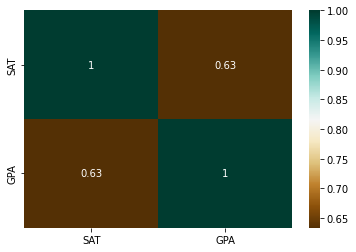

In [ ]:
sns.heatmap(c,cmap = 'BrBG',annot = True)

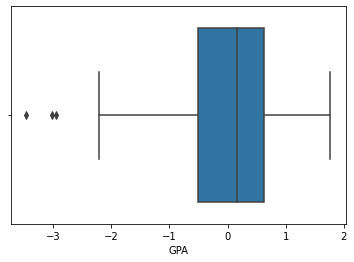

In [ ]:
sns.boxplot(x=new_df['GPA'])

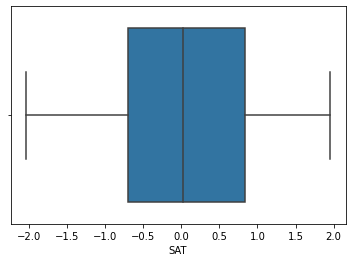

In [ ]:
sns.boxplot(x=new_df['SAT'])

1) Split the dataset into train and test. Justify your selection of train-test split ratio.

In [ ]:
training_data = new_df.sample(frac=0.8, random_state=10)
testing_data = new_df.drop(training_data.index)
training_data = training_data.sort_values(by =['SAT'])
testing_data = testing_data.sort_values(by =['SAT'])

2) Plot the train and test data points

Text(0.5, 1.0, 'Testing data set (SAT VS GPA)')

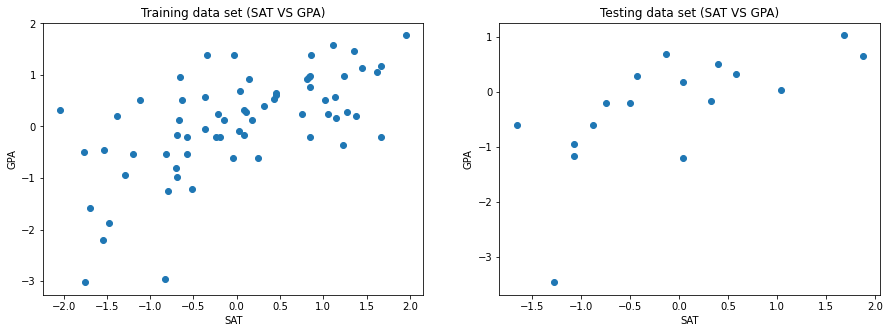

In [ ]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.scatter(training_data['SAT'],training_data['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Training data set (SAT VS GPA)')

plt.subplot(1,2,2)
plt.scatter(testing_data['SAT'],testing_data['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Testing data set (SAT VS GPA)')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
x = training_data.drop('GPA',axis=1)
y = training_data.drop('SAT',axis=1)

print(x.shape)
print(y.shape)

(66, 1)
(66, 1)


In [ ]:
x_test = testing_data.drop('GPA',axis=1)
y_test = testing_data.drop('SAT',axis=1)

3) Create a simple linear regression model. Draw the regression plot and find the training score and R2 score ( of the test data)

In [ ]:
regressor_1 = LinearRegression()
regressor_1.fit(x,y)
y_pred = regressor_1.predict(x_test)

Text(0.5, 1.0, 'Linear regression model')

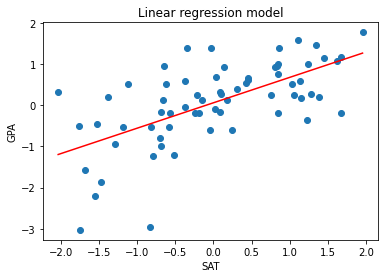

In [ ]:
plt.scatter(training_data['SAT'],training_data['GPA'])
plt.plot(x,regressor_1.predict(x),color = 'red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Linear regression model')

In [ ]:
print("Training score is :",regressor_1.score(x,y))
print("R2 score is :",r2_score(y_test,y_pred))

Training score is : 0.39631344976078653
R2 score is : 0.34274865055631853


4) Create a polynomial regression model of degrees 2,3,4 and 5. Compare the scores ( training and R2 (test) )of all the five models and infer your conclusion

Training score when degree is 2: 0.4043441253539274
R2 score when degree is 2: 0.3576298408770041
Training score when degree is 3: 0.40720235421011297
R2 score when degree is 3: 0.36923973081470485
Training score when degree is 4: 0.4468144977697811
R2 score when degree is 4: 0.4219328188844089
Training score when degree is 5: 0.44893935412671526
R2 score when degree is 5: 0.4437081476787018


Text(0.5, 1.0, 'Polynomial Regression of degree 5')

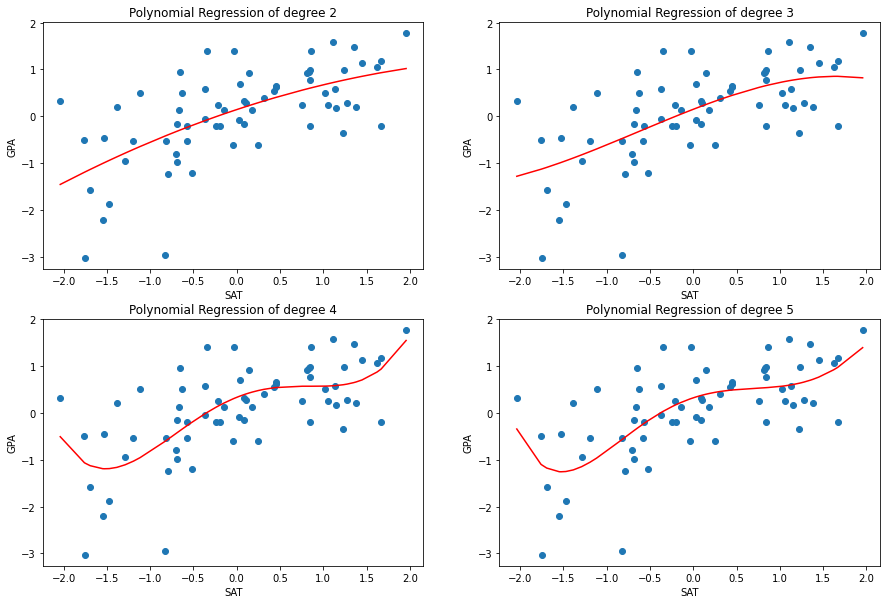

In [ ]:
plt.figure(figsize = (15,10))

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)
x_polytest = poly.transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)
print("Training score when degree is 2:",poly_reg.score(x_poly,y))
print("R2 score when degree is 2:",r2_score(y_test,poly_reg.predict(x_polytest)))
plt.subplot(2,2,1)
plt.scatter(training_data['SAT'],training_data['GPA'])
plt.plot(x,poly_reg.predict(x_poly),color = 'red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Polynomial Regression of degree 2')


poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)
x_polytest = poly.transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)
print("Training score when degree is 3:",poly_reg.score(x_poly,y))
print("R2 score when degree is 3:",r2_score(y_test,poly_reg.predict(x_polytest)))
plt.subplot(2,2,2)
plt.scatter(training_data['SAT'],training_data['GPA'])
plt.plot(x,poly_reg.predict(x_poly),color = 'red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Polynomial Regression of degree 3')


poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)
x_polytest = poly.transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)
print("Training score when degree is 4:",poly_reg.score(x_poly,y))
print("R2 score when degree is 4:",r2_score(y_test,poly_reg.predict(x_polytest)))
plt.subplot(2,2,3)
plt.scatter(training_data['SAT'],training_data['GPA'])
plt.plot(x,poly_reg.predict(x_poly),color = 'red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Polynomial Regression of degree 4')

poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(x)
x_polytest = poly.transform(x_test)
poly.fit(x_poly, y)
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)
print("Training score when degree is 5:",poly_reg.score(x_poly,y))
print("R2 score when degree is 5:",r2_score(y_test,poly_reg.predict(x_polytest)))
plt.subplot(2,2,4)
plt.scatter(training_data['SAT'],training_data['GPA'])
plt.plot(x,poly_reg.predict(x_poly),color = 'red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Polynomial Regression of degree 5')



5) Plot the mean square error of training and testing data for model complexity from 1 to 50. From the plot figure out the best model complexity and mark the regions of overfitting and underfitting

In [ ]:
mse_train = []
mse_test = []
for i in range (1,51):
  poly = PolynomialFeatures(degree = i)
  x_poly = poly.fit_transform(x)
  x_polytest = poly.fit_transform(x_test)

  poly_reg = LinearRegression()
  poly_reg.fit(x_poly,y)

  mse_train.append(mean_squared_error(y,poly_reg.predict(x_poly)))
  mse_test.append(mean_squared_error(y_test,poly_reg.predict(x_polytest)))



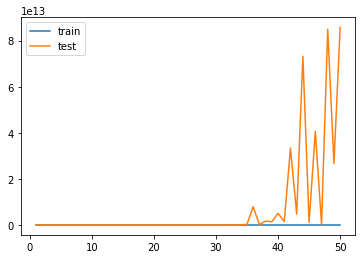

In [ ]:

complexity = list(range(1,51))
plt.plot(complexity,mse_train)
plt.plot(complexity,mse_test)
plt.legend(['train','test'])
